## Univariate roc-auc or mse (or any other metric really)

This procedure works as follows:

- First, it builds one decision tree per feature, to predict the target
- Second, it makes predictions using the decision tree and the mentioned feature
- Third, it measures the performance of that prediction, be it the roc-auc, the mse, or any other metric
- Fourth, it ranks the features according to the machine learning metric (roc-auc or mse)
- It selects the highest ranking features

Here, I will demonstrate how to select features based on univariate roc-auc or univariate mse.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

## Classification

In [3]:
# load dataset
data = pd.read_csv('dataset_2.csv')
data.shape

(50000, 109)

In [4]:
data.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


**Important**

In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [5]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

### Determine univariate roc-auc

In [6]:
# determine roc-auc for each feature

# here we store the roc-auc values
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values[0:10]

[0.5069248231292061,
 0.5006908738145861,
 0.4931445654646017,
 0.5039101753068067,
 0.5014351366034588,
 0.5028347252717772,
 0.5095234564543892,
 0.5062626193645395,
 0.4913455716601861,
 0.5066196352647712]

Text(0, 0.5, 'roc-auc')

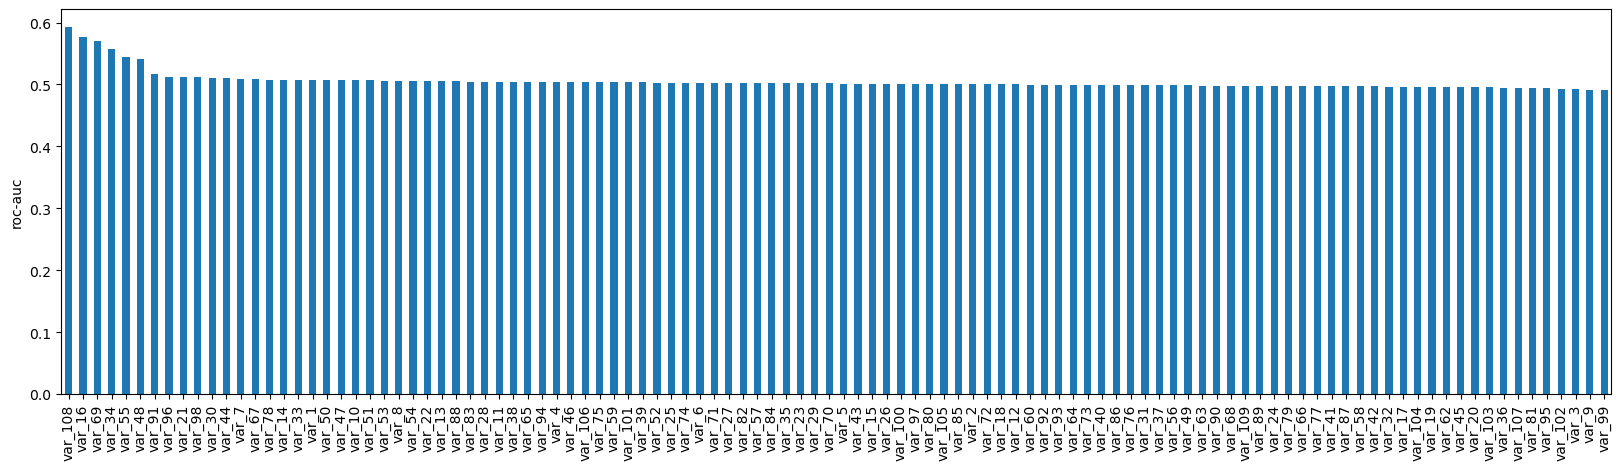

In [7]:
# now let's:

# 1) capture the roc-auc values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the roc-auc
# 4) and make a var plot

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [8]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.5])

67

67 of 108  features show a predictive performance higher than 0.5.

You can of course tune the parameters of the Decision Tree to get better predictions and thus, more reliable metrics.

### Select features with roc-auc > 0.5

In [9]:
selected_features = roc_values[roc_values > 0.5].index

selected_features

Index(['var_1', 'var_2', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_18',
       'var_21', 'var_22', 'var_23', 'var_25', 'var_26', 'var_27', 'var_28',
       'var_29', 'var_30', 'var_33', 'var_34', 'var_35', 'var_38', 'var_39',
       'var_43', 'var_44', 'var_46', 'var_47', 'var_48', 'var_50', 'var_51',
       'var_52', 'var_53', 'var_54', 'var_55', 'var_57', 'var_59', 'var_65',
       'var_67', 'var_69', 'var_70', 'var_71', 'var_72', 'var_74', 'var_75',
       'var_78', 'var_80', 'var_82', 'var_83', 'var_84', 'var_85', 'var_88',
       'var_91', 'var_94', 'var_96', 'var_97', 'var_98', 'var_100', 'var_101',
       'var_105', 'var_106', 'var_108'],
      dtype='object')

In [10]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((35000, 67), (15000, 67))

## Regression

In [12]:
# load dataset

data = pd.read_csv('houseprice.csv')
data.shape

(1460, 81)

In [13]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [14]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

### Determine univariate mse

In [15]:
# determine mse for each feature

# here we store the mse values
mse_values = []

# iterate over each variable
for feature in X_train.columns:
    
    # train a decision tree
    clf = DecisionTreeRegressor(random_state=0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    
    # make a prediction
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    
    # determine the mse and store it
    mse_values.append(mean_squared_error(y_test, y_scored))
    
    
# display the result
mse_values[0:10]

[13268032828.324202,
 5258423546.061133,
 6827291221.813821,
 8379936849.301367,
 2097026635.6820993,
 6026309350.815287,
 4776574901.81357,
 5138584000.327346,
 7867108586.811187,
 7696158357.724333]

<Axes: >

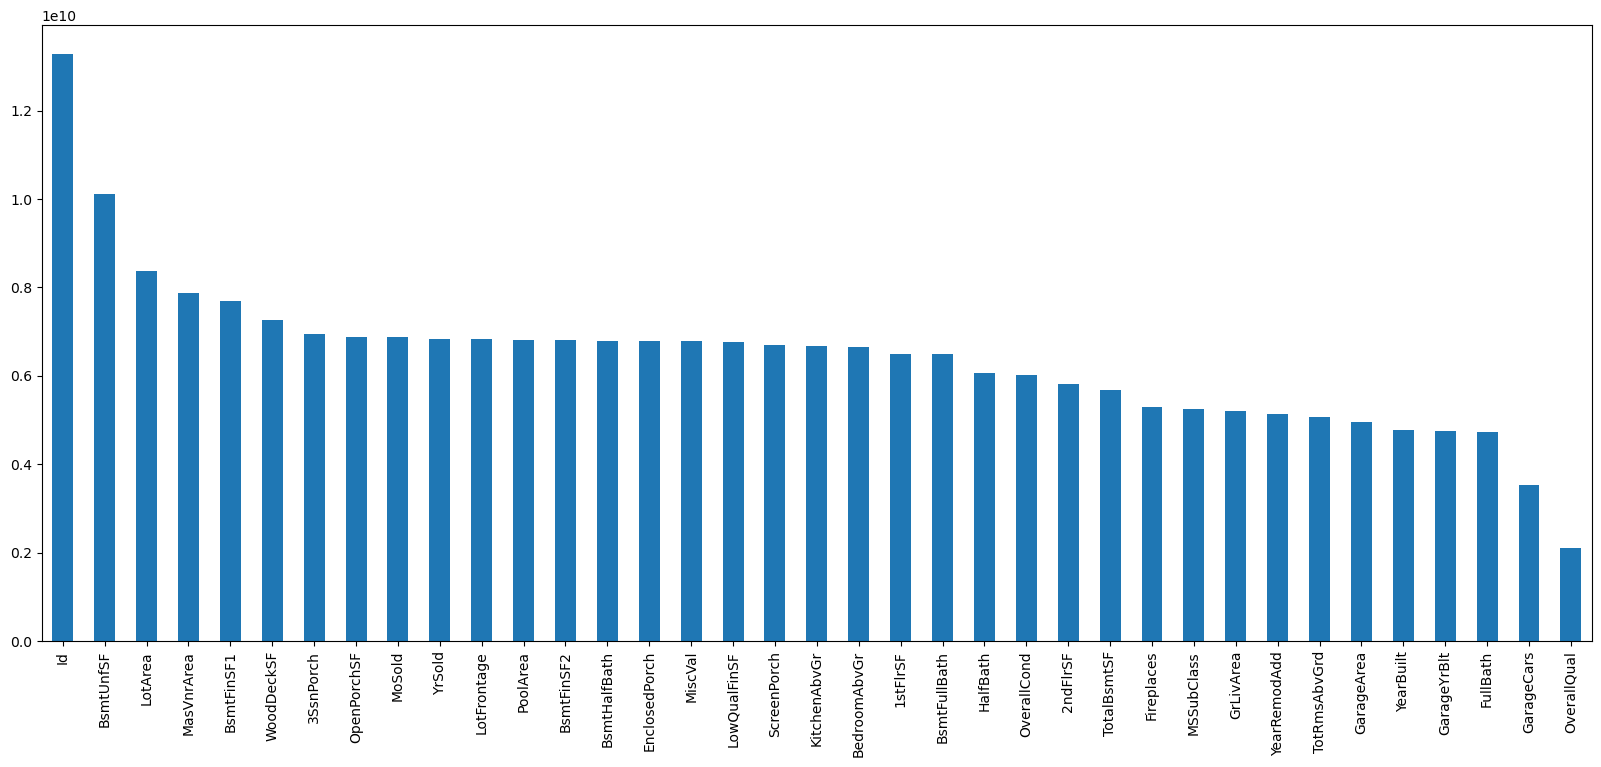

In [16]:
# now let's:

# 1) capture the mse values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the mse
# 4) and make a var plot

mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

Remember that for regression, the smaller the mse, the better the model performance is.

To select features, we need a threshold, or cut-off. To follow Scikit-learn selection implementation, which we will discuss in coming notebooks, I will select those features which mse is below the mean mse.

### Select features

In [17]:
selected_features = mse_values[mse_values < np.mean(mse_values)].index

selected_features

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [18]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((1022, 15), (438, 15))

I do use this method in my projects, particularly when I have an enormous amount of features and I need to start reducing the feature space quickly.

You can see an example use case in [my talk at pydata London](https://www.youtube.com/watch?v=KHGGlozsRtA)

That is all for this lecture, I hope you enjoyed it and see you in the next one!